In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.shape

(3333, 11)

In [5]:
df.info

<bound method DataFrame.info of       Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1      

In [6]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [7]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [8]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [10]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [11]:
X = pd.get_dummies(X,drop_first=True)

In [12]:
X.shape

(3333, 10)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape

((2666, 10), (667, 10))

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.76      0.58      0.60       667
weighted avg       0.84      0.86      0.83       667



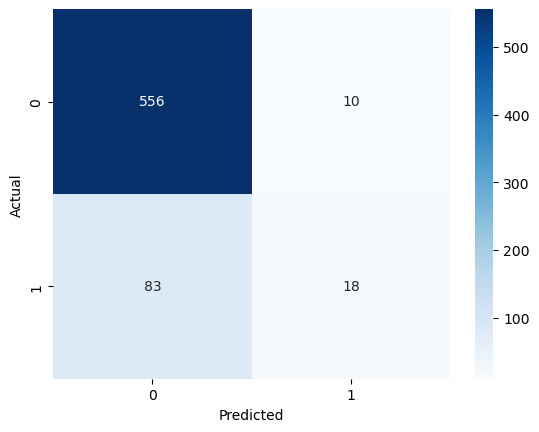

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
balanced_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

balanced_model.fit(X_train_scaled, y_train)

y_pred_bal = balanced_model.predict(X_test_scaled)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       566
           1       0.40      0.80      0.53       101

    accuracy                           0.79       667
   macro avg       0.68      0.79      0.70       667
weighted avg       0.87      0.79      0.81       667

